In [1]:
# Predict future sales of shops and products

In [43]:
# importing libraries

import pandas as pd
import matplotlib as mlt
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [3]:
# reading datasets

In [4]:
sales_train = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/predict_future_sales/sales_train.csv")
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [5]:
test = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/predict_future_sales/test.csv")
test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [6]:
samp = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/predict_future_sales/sample_submission.csv")
samp.head(10)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
5,5,0.5
6,6,0.5
7,7,0.5
8,8,0.5
9,9,0.5


In [7]:
items = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/predict_future_sales/items.csv")
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [8]:
cat = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/predict_future_sales/item_categories.csv")
cat.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [9]:
shops = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/predict_future_sales/shops.csv")
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [10]:
# merging datasets

sales_train.shape

(2935849, 6)

In [11]:
sales2 = sales_train.merge(items, on = "item_id", how="left")

In [12]:
sales2.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55


In [13]:
sales2.shape

(2935849, 8)

In [14]:
sales3 = sales2.merge(shops, on="shop_id", how = "left")

In [15]:
sales3.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум"""
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум"""
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,"Москва ТРК ""Атриум"""
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум"""
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум"""
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,"Москва ТРК ""Атриум"""


In [16]:
sales3.shape

(2935849, 9)

In [17]:
sales4 = sales3.merge(cat, on = "item_category_id", how = "left")

In [18]:
sales4.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",Музыка - Музыкальное видео
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства


In [19]:
sales4.shape

(2935849, 10)

In [20]:
sales5 = sales4.groupby(by="shop_id", sort = True)

In [21]:
sales5 = sales4

In [22]:
sales5['mnt_cnt'] = sales5.groupby(['shop_id', 'item_id', 'date_block_num']).item_cnt_day.transform(np.sum)

In [23]:
sales5.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,mnt_cnt
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,1.0
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,0.0
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,0.0
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,1.0
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,1.0
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",Музыка - Музыкальное видео,1.0
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,1.0
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,2.0
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,2.0
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,3.0


In [24]:
sales5['shop_mnt'] = sales5.groupby(['shop_id', 'date_block_num']).item_cnt_day.transform(np.sum)

In [25]:
sales5.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,mnt_cnt,shop_mnt
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,1.0,2017.0
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,0.0,8215.0
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,0.0,8215.0
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,1.0,8215.0
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,1.0,8215.0
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",Музыка - Музыкальное видео,1.0,8215.0
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,1.0,8215.0
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,2.0,8215.0
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,2.0,8215.0
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,3.0,8215.0


In [26]:
sales5['item_mnt'] = sales5.groupby(['item_id', 'date_block_num']).item_cnt_day.transform(np.sum)

In [27]:
sales5.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,mnt_cnt,shop_mnt,item_mnt
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,1.0,2017.0,18.0
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,0.0,8215.0,0.0
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,0.0,8215.0,0.0
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,1.0,8215.0,1.0
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,1.0,8215.0,2.0
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",Музыка - Музыкальное видео,1.0,8215.0,5.0
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,1.0,8215.0,2.0
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,2.0,8215.0,12.0
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,2.0,8215.0,12.0
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства,3.0,8215.0,16.0


In [35]:
bar1 = sales5[['shop_id', 'date_block_num', 'shop_mnt']]

In [36]:
bar1 = bar1.drop_duplicates()
bar1.shape

(1586, 3)

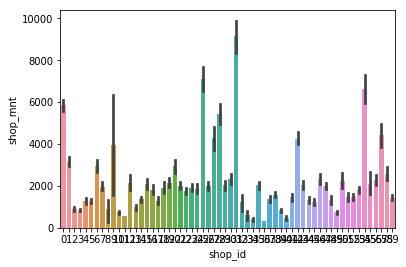

In [49]:
sb.barplot(x="shop_id", y="shop_mnt", data = bar1)
plt.show()